In [1]:
import fastai
import torch
import numpy as np
import json
from fastai.vision import *
from argparse import Namespace
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
args = Namespace(
    model_dir = '../model',
    fastai_model = 'fastai.pkl',
    yolo_model = 'last.pt',
    data = '../data',
    test_image = '../test12.jpg',
    pytorch_model = 'fastai.pt'
)

# Fastai Test

* Testint fastai

In [3]:
learner = load_learner(path=args.model_dir, file=args.fastai_model, device='cpu')

In [4]:
names = learner.data.classes

In [5]:
names

['aguacate',
 'arroz_basmati_castellanox1000g',
 'arroz_blanco_carullax1000g',
 'arroz_vitamor_dianax500g',
 'chicharron_americano_jacksx15g',
 'coca_cola_originalx250ml',
 'coca_cola_originalx400ml',
 'mango_tommy',
 'maracuya',
 'pan_de_queso_la_frontera',
 'pan_de_queso_largo_la_frontera',
 'pan_mantequilla_la_fronterax55g',
 'papas_limon_margarita_packeconomicox300g',
 'papas_limon_margaritax105g',
 'papas_limon_margaritax110g',
 'papas_limon_margaritax39g',
 'spagheti_barilla',
 'yogurt_alpina_finesse_fresax150g',
 'yogurt_alpina_finesse_fresax180g',
 'yogurt_alpina_finesse_frutos_rojosx180g',
 'yogurt_alpina_finesse_melocotonx180g']

In [6]:
img_test = open_image(args.test_image)

In [7]:
class_name, class_index, probabilities = learner.predict(img_test)

In [8]:
print(json.dumps({names[idx]: round(prob.item(), 7) for idx, prob in enumerate(probabilities)}, indent=True))

{
 "aguacate": 4e-07,
 "arroz_basmati_castellanox1000g": 4e-07,
 "arroz_blanco_carullax1000g": 0.0,
 "arroz_vitamor_dianax500g": 0.0,
 "chicharron_americano_jacksx15g": 1e-07,
 "coca_cola_originalx250ml": 1e-07,
 "coca_cola_originalx400ml": 2e-07,
 "mango_tommy": 0.0,
 "maracuya": 2.5e-06,
 "pan_de_queso_la_frontera": 0.9999807,
 "pan_de_queso_largo_la_frontera": 1.5e-06,
 "pan_mantequilla_la_fronterax55g": 5.4e-06,
 "papas_limon_margarita_packeconomicox300g": 0.0,
 "papas_limon_margaritax105g": 1.3e-06,
 "papas_limon_margaritax110g": 5.5e-06,
 "papas_limon_margaritax39g": 8e-07,
 "spagheti_barilla": 8e-07,
 "yogurt_alpina_finesse_fresax150g": 4e-07,
 "yogurt_alpina_finesse_fresax180g": 0.0,
 "yogurt_alpina_finesse_frutos_rojosx180g": 0.0,
 "yogurt_alpina_finesse_melocotonx180g": 1e-07
}


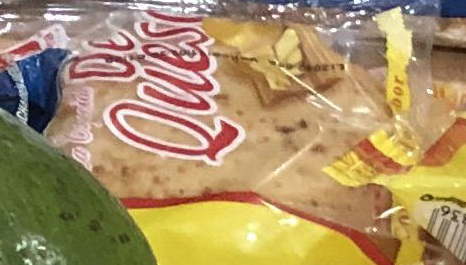

In [19]:
img_test

# Pytorch Test

In [9]:
example = img_test.data

In [16]:
img_test.data.shape

torch.Size([3, 265, 466])

In [10]:
# Export model to pytorch
learner.model.eval()
traced_script_module = torch.jit.trace(learner.model.cpu(), example.unsqueeze(0))
traced_script_module.save(os.path.join(args.model_dir, args.pytorch_model))

In [11]:
model_pytorch = torch.jit.load(os.path.join(args.model_dir, args.pytorch_model))

In [12]:
with torch.no_grad():
    pred = torch.softmax(model_pytorch(learner.data.one_item(img_test)[0]), 1)

In [13]:
result1 = json.dumps({names[idx]: prob.item() for idx, prob in enumerate(pred[0])}, indent=True)

In [17]:
img = Image.open(args.test_image)

mean, std = learner.data.stats
normalize = transforms.Normalize(
   mean=mean,
   std=std
)

unnormalize = transforms.Normalize(
    mean=(-mean / std),
    std=(1/std)
)

preprocess = transforms.Compose([
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

data = preprocess(img).unsqueeze(0)

with torch.no_grad():
    pred = torch.softmax(model_pytorch(data), 1)
    
result2 = json.dumps({names[idx]: prob.item() for idx, prob in enumerate(pred[0])}, indent=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


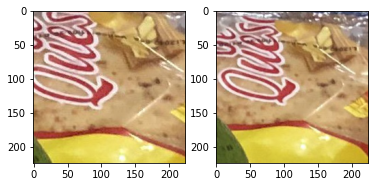

In [18]:
plt.subplot(1,2,1)
plt.imshow(np.transpose(unnormalize(data.squeeze()), (1, 2, 0)))
plt.subplot(1,2,2)
plt.imshow(np.transpose(unnormalize(learner.data.one_item(img_test)[0].squeeze()), (1, 2, 0)))
plt.show()

In [19]:
_,_,pred = learner.predict(img_test)
result3 = json.dumps({names[idx]: prob.item() for idx, prob in enumerate(pred)}, indent=True)

In [20]:
print(result3)

{
 "aguacate": 4.5206132881503436e-07,
 "arroz_basmati_castellanox1000g": 7.38334929337725e-05,
 "arroz_blanco_carullax1000g": 4.3105276859023434e-07,
 "arroz_vitamor_dianax500g": 1.0588875056782854e-06,
 "chicharron_americano_jacksx15g": 0.000129504973301664,
 "coca_cola_originalx250ml": 1.9354458800080465e-06,
 "coca_cola_originalx400ml": 6.892061355756596e-05,
 "mango_tommy": 1.8855058669942082e-07,
 "maracuya": 5.810855327581521e-06,
 "pan_de_queso_la_frontera": 0.9504761695861816,
 "pan_mantequilla_la_fronterax55g": 0.0019738604314625263,
 "papas_limon_margarita_packeconomicox300g": 1.8033838387054857e-06,
 "papas_limon_margaritax105g": 1.4554339031747077e-05,
 "papas_limon_margaritax110g": 6.6035781856044196e-06,
 "papas_limon_margaritax39g": 0.04604698345065117,
 "spagheti_barilla": 0.0011884294217452407,
 "yogurt_alpina_finesse_fresax150g": 4.6093791183920985e-07,
 "yogurt_alpina_finesse_fresax180g": 3.3640048968663905e-06,
 "yogurt_alpina_finesse_frutos_rojosx180g": 1.24409098

In [34]:
print(result2)

{
 "aguacate": 2.099252560583409e-05,
 "arroz_basmati_castellanox1000g": 0.0007284575840458274,
 "arroz_blanco_carullax1000g": 1.2956797945662402e-05,
 "arroz_vitamor_dianax500g": 0.00011318480392219499,
 "chicharron_americano_jacksx15g": 0.0003127458330709487,
 "coca_cola_originalx250ml": 2.3343420252786018e-05,
 "coca_cola_originalx400ml": 0.0008501130505464971,
 "mango_tommy": 5.113663064548746e-06,
 "maracuya": 0.00021416154049802572,
 "pan_de_queso_la_frontera": 0.06875105202198029,
 "pan_mantequilla_la_fronterax55g": 0.04039067402482033,
 "papas_limon_margarita_packeconomicox300g": 4.651585186365992e-05,
 "papas_limon_margaritax105g": 4.777478170581162e-05,
 "papas_limon_margaritax110g": 9.563566709402949e-05,
 "papas_limon_margaritax39g": 0.8869603872299194,
 "spagheti_barilla": 0.0012891911901533604,
 "yogurt_alpina_finesse_fresax150g": 6.621757165703457e-06,
 "yogurt_alpina_finesse_fresax180g": 9.282738028559834e-05,
 "yogurt_alpina_finesse_frutos_rojosx180g": 8.11509562481660

In [16]:
print(result1)

{
 "aguacate": 4.5206132881503436e-07,
 "arroz_basmati_castellanox1000g": 7.38334929337725e-05,
 "arroz_blanco_carullax1000g": 4.3105276859023434e-07,
 "arroz_vitamor_dianax500g": 1.0588875056782854e-06,
 "chicharron_americano_jacksx15g": 0.000129504973301664,
 "coca_cola_originalx250ml": 1.9354458800080465e-06,
 "coca_cola_originalx400ml": 6.892061355756596e-05,
 "mango_tommy": 1.8855058669942082e-07,
 "maracuya": 5.810855327581521e-06,
 "pan_de_queso_la_frontera": 0.9504761695861816,
 "pan_mantequilla_la_fronterax55g": 0.0019738604314625263,
 "papas_limon_margarita_packeconomicox300g": 1.8033838387054857e-06,
 "papas_limon_margaritax105g": 1.4554339031747077e-05,
 "papas_limon_margaritax110g": 6.6035781856044196e-06,
 "papas_limon_margaritax39g": 0.04604698345065117,
 "spagheti_barilla": 0.0011884294217452407,
 "yogurt_alpina_finesse_fresax150g": 4.6093791183920985e-07,
 "yogurt_alpina_finesse_fresax180g": 3.3640048968663905e-06,
 "yogurt_alpina_finesse_frutos_rojosx180g": 1.24409098